# Proyek Analisis Data:Bike Sharing Dataset
- **Nama:** Irfan Luthfi
- **Email:** irfan150503@gmail.com
- **ID Dicoding:** mc189d5y0427

## Menentukan Pertanyaan Bisnis

- Pada musim apa penyewaan sepeda paling banyak dan paling sedikit dilakukan?
- Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit sepanjang tahun 2011 dan 2012?
- Bagaimana Perbandingan jumlah penyewaan sepeda antara jam 00.00-11.59 dengan jam 12.00-23.59 (AM dan PM)?
- Bagaimana perbandingan jumlah antara pelanggan jenis registered dan casual ?
- Bagaimana performa penyewaan sepeda per bulan tiap tahunnya?


## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
#Mengumpulkan data day(hari) menjadi satu data frame dengan nama day_df
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
#Mengumpulkan data hour(jam) menjadi satu data frame dengan nama hour_df
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**> Mengecek Tipe Data**

In [8]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada info diatas kita dapat melihat bahwa kolom dteday bertipe object,untuk memnaipulasi tanggal ini maka kita nantinya akan merubah data kolom ini menjadi datetime

**> Mengecek Missing Value**

In [10]:
# mengecek keberadaan missing value di dataset day_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**> Mengecek duplikasi data pada dataset**

In [12]:
# memeriksa duplikasi
print("Jumlah duplikasi pada dataframe df_day: ", day_df.duplicated().sum())
print("Jumlah duplikasi pada dataframe df_hour: ", hour_df.duplicated().sum())

Jumlah duplikasi pada dataframe df_day:  0
Jumlah duplikasi pada dataframe df_hour:  0


**> memeriksa parameter statistik dari kolom numerik pada dataframe**

In [13]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Berdasarkan informasi data yang telah kita kumpulkan dan kita nilai dapat dilihat tidak ada missing value,duplikat data, dan juga data terlihat normal tanpa outlier. Maka kita tidak perlu memodifikasi nilai data. Namun ada beberapa hal yang perlu kita perbaharui yaitu sebagai berikut :
* men drop data yang tidak relevan atau tidak digunakan. Kolom yang di maksud adalah kolom instant.
* kita akan menghandling tipe data dteday yang tadinya 'object' akan kita ubah menjadi 'datetime'.
* Mengganti nama kolom agar lebih mudah dibaca.
* Berdasarkan informasi yang kita dapatkan pada kedua dataframe diatas masih terdapat beberapa kolom yang tipenya perlu kita ganti, disini kolom yang kita perlu ganti adalah kolom 'year', 'season', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit' menjadi tipe kategori.
* Mengkonversi isi kolom agar mudah dipahami.

**> Mendrop Kolom yang tidak diperlukan**

In [15]:
#Men drop kolom instant pada dataframe day_df dan hour_df
day_df = day_df.drop(columns = ['instant'])
hour_df = hour_df.drop(columns = ['instant'])

**> Menkonversi tipe data 'object' menjadi 'datetime'**


In [16]:
# menghandling tipe data dteday yang tadinya 'object' akan kita ubah menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [17]:
#Melihat perubahan data tipe pada kolom 'dteday' di dataframe day_df dan hour_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
<class '

**> Merubah nama kolom menjadi lebih mudah dimengerti**

In [18]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
day_df = day_df.rename(columns = {'dteday':'date',
                                  'weekday':'day_name',
                                  'weathersit':'weather',
                                  'yr':'year','mnth':'month',
                                  'hum':'humidity','cnt':'count'})

In [19]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df = hour_df.rename(columns = {'dteday':'date',
                                    'weekday':'day_name',
                                    'weathersit':'weather',
                                    'yr':'year','mnth':'month',
                                    'hr':'hour','hum':'humidity',
                                    'cnt':'count'})

**> Merubah Kolom INT menjadi categorical**

In [20]:
#Mendeklarasi kolom kolom di day_df yang ingin dirubah menjadi tipe kategori ke dalam list
#Kemudian dirubah dengan menggunakan looping
columns_day = ['season' ,'year' ,'month' ,'holiday' ,'day_name' ,'workingday' ,'weather']

for col in columns_day:
    day_df[col] = day_df[col].astype('category')


#Mendeklarasi kolom kolom di hour_df yang ingin dirubah menjadi tipe kategori ke dalam list
#Kemudian dirubah dengan menggunakan looping
columns_hour = ['season' ,'year', 'month'  ,'holiday' ,'day_name' ,'workingday' ,'weather']

for col in columns_hour:
    hour_df[col] = hour_df[col].astype('category')


**> Mengkonversi isi kolom agar lebih mudah dipahami**

In [21]:
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi day_name menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.day_name.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.day_name.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

C:\Users\lutfh\AppData\Local\Temp\ipykernel_10040\1374621902.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\lutfh\AppData\Local\Temp\ipykernel_10040\1374621902.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.

Setelah Melakukan beberapa kode diatas maka dapat dilihat perubahan yang telah kita lakukan yaitu:
* Berhasil Men-drop kolom 'instant' pada kedua dataframe dimana kolom ini tidak digunakan.
* Telah merubah tide data pada kolom 'dtedate' dari **object** menjadi **datetime**
* Merubah beberapa nama kolom sehingga menjadi lebih mudah dimengerti
* Berhasil Merubah beberapa kolom dari tipe INT menjadi kategorial yang relevan
* Mengkonversi beberapa nilai kolom kategorial yang isinya masih angka menjadi string sesuai dengan konteks kolom.


## Exploratory Data Analysis (EDA)

### Explore ...

 **Explore data day_df**

In [22]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,date,season,year,month,holiday,day_name,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,0.0,Sunday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari informasi statistik data df_day dapat kita ketahui bahwa jumlah pelanggan yang paling banyak adalah di musim fall atau musim dingin. Untuk memastikannya kita bisa melihat perbandingan pelanggan tiap musim sebagai berikut:

In [23]:
# melihat jumlah penyewaan tiap season dan diurutkan berdasarkan nilai yang paling tinggi
day_df.groupby(by="season").agg({
    "count" : "sum"
}).sort_values(by="count", ascending=False)

C:\Users\lutfh\AppData\Local\Temp\ipykernel_10040\4000366204.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


,count
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


Karena ada 2 jenis peminjaman yaitu Registered dan Casual,Maka kita perlu Meng grouping kedua data ini sehingga Kita tahu berapa perbedaan total penyewaaan sepeda jenis Registered dan Casual

In [24]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]


})

C:\Users\lutfh\AppData\Local\Temp\ipykernel_10040\3482625092.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="year").agg({


,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Dapat kita lihat bahwa ada perbedaan signifikan dari pelanggan Berjenis Registered dan Casual.

**> Explore Data hour_df**

In [25]:
# melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,date,season,year,month,hour,holiday,day_name,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jul,NaN,0.0,Saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan Informasi di atas kita dapat mengetahui bahwa waktu paling sering pelanggan menyewa sepeda adalah di jam 17.00 sore hari. Untuk membuktikannya kita melakukan sorting sebagai berikut:

In [26]:
# penyewaan berdasarkan jam dimulai dari jam ke-0 hingga ke 23
hour_df.groupby(by="hour").agg({
    "count": ["sum"]
})

,count
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


In [27]:
# penyewaan berdasarkan jam diurutkan berdasarkan banyaknya pelanggan di jam tersebut secara descending
hour_df.groupby(by="hour").agg({
    "count": "sum"
}).sort_values(by="count", ascending = False)

,count
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


Menampilkan perbandingan jumlah penyewaan sepeda antara jam 00.00-11.59 dengan jam 12.00-23.59

In [28]:
# Menambahkan kolom 'AM_PM' pada dataframe hour_df untuk kategori AM atau PM
hour_df['AM_PM'] = hour_df['hour'].apply(lambda x: 'AM' if x < 12 else 'PM')

# Mengelompokkan berdasarkan 'AM_PM' dan menghitung total count
result_df = hour_df.groupby('AM_PM')['count'].sum().reset_index()

# Mengganti nama kolom agar lebih informatif
result_df.columns = ['TIME', 'Total Penyewaan']

print(result_df)

  TIME  Total Penyewaan
0   AM          1013828
1   PM          2278851


Bisa dilihat berdasarkan hasil perhitungan diatas bahwa Waktu Penyewaan Sepeda Lebih banyak dilakukan pada Waktu PM yaitu jam 12 siang hingga 11.59 Malam dengan total 2.25 kali lipat lebih banyak dibanding waktu AM.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Pada musim apa penyewaan sepeda paling banyak dan paling sedikit dilakukan?

C:\Users\lutfh\AppData\Local\Temp\ipykernel_10040\3952651755.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


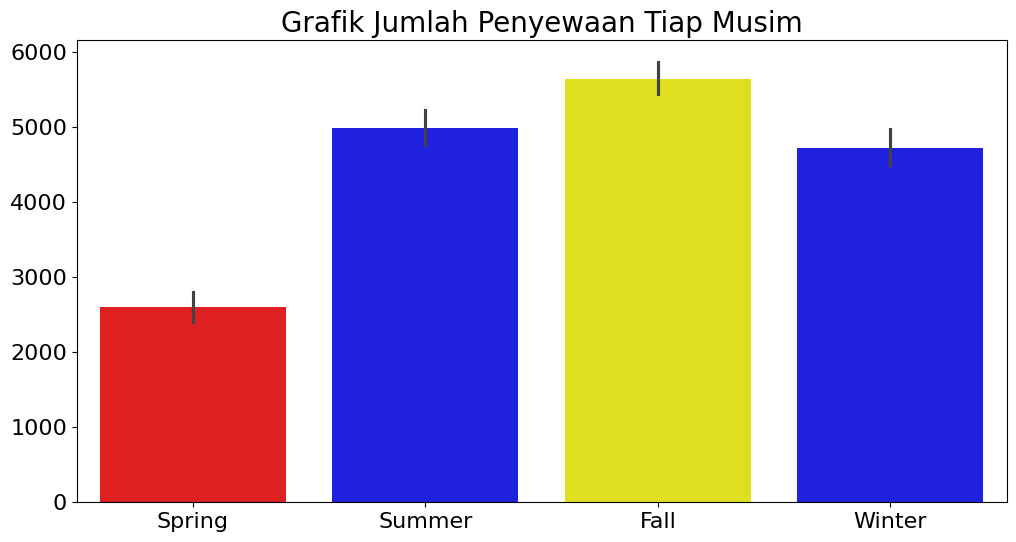

In [29]:
# mengatur warna
colors = ["red", "blue", "yellow", "blue"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (12, 6)
fig, ax = plt.subplots(figsize=(12, 6))

# Buat barplot untuk y="count" dan x="season", menggunakan dataframe day_df
sns.barplot(
        y="count",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Jumlah Penyewaan Tiap Musim", loc="center", fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# menampilkan plot
plt.show()

Penyewaan Sepeda Di tahun 2011 dan 2012 Paling banyak dilakukan  Pada Musim Fall atau musim gugur dengan total penyewaan sebanyak 1061129 , Sedangkan Musim dengan paling sedikit dilakukan penyewaan sepeda Dilakukan pada musim Spring atau musim semi sebanyak 471348 penyewaan.

### Pertanyaan 2: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit sepanjang tahun 2011 dan 2012?

In [30]:
# Melakukan grouping kolom hour dan count dan diurutkan secara descending
sum_hour_df = hour_df.groupby("hour")['count'].sum().sort_values(ascending=False).reset_index()

C:\Users\lutfh\AppData\Local\Temp\ipykernel_10040\2857534441.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="count", data=sum_hour_df.head(5), palette=["blue", "blue", "yellow", "blue", "blue"], ax=ax[0])
C:\Users\lutfh\AppData\Local\Temp\ipykernel_10040\2857534441.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="count", data=sum_hour_df.sort_values(by="hour", ascending=True).head(5), palette=["blue", "blue", "blue", "blue","red"], ax=ax[1])


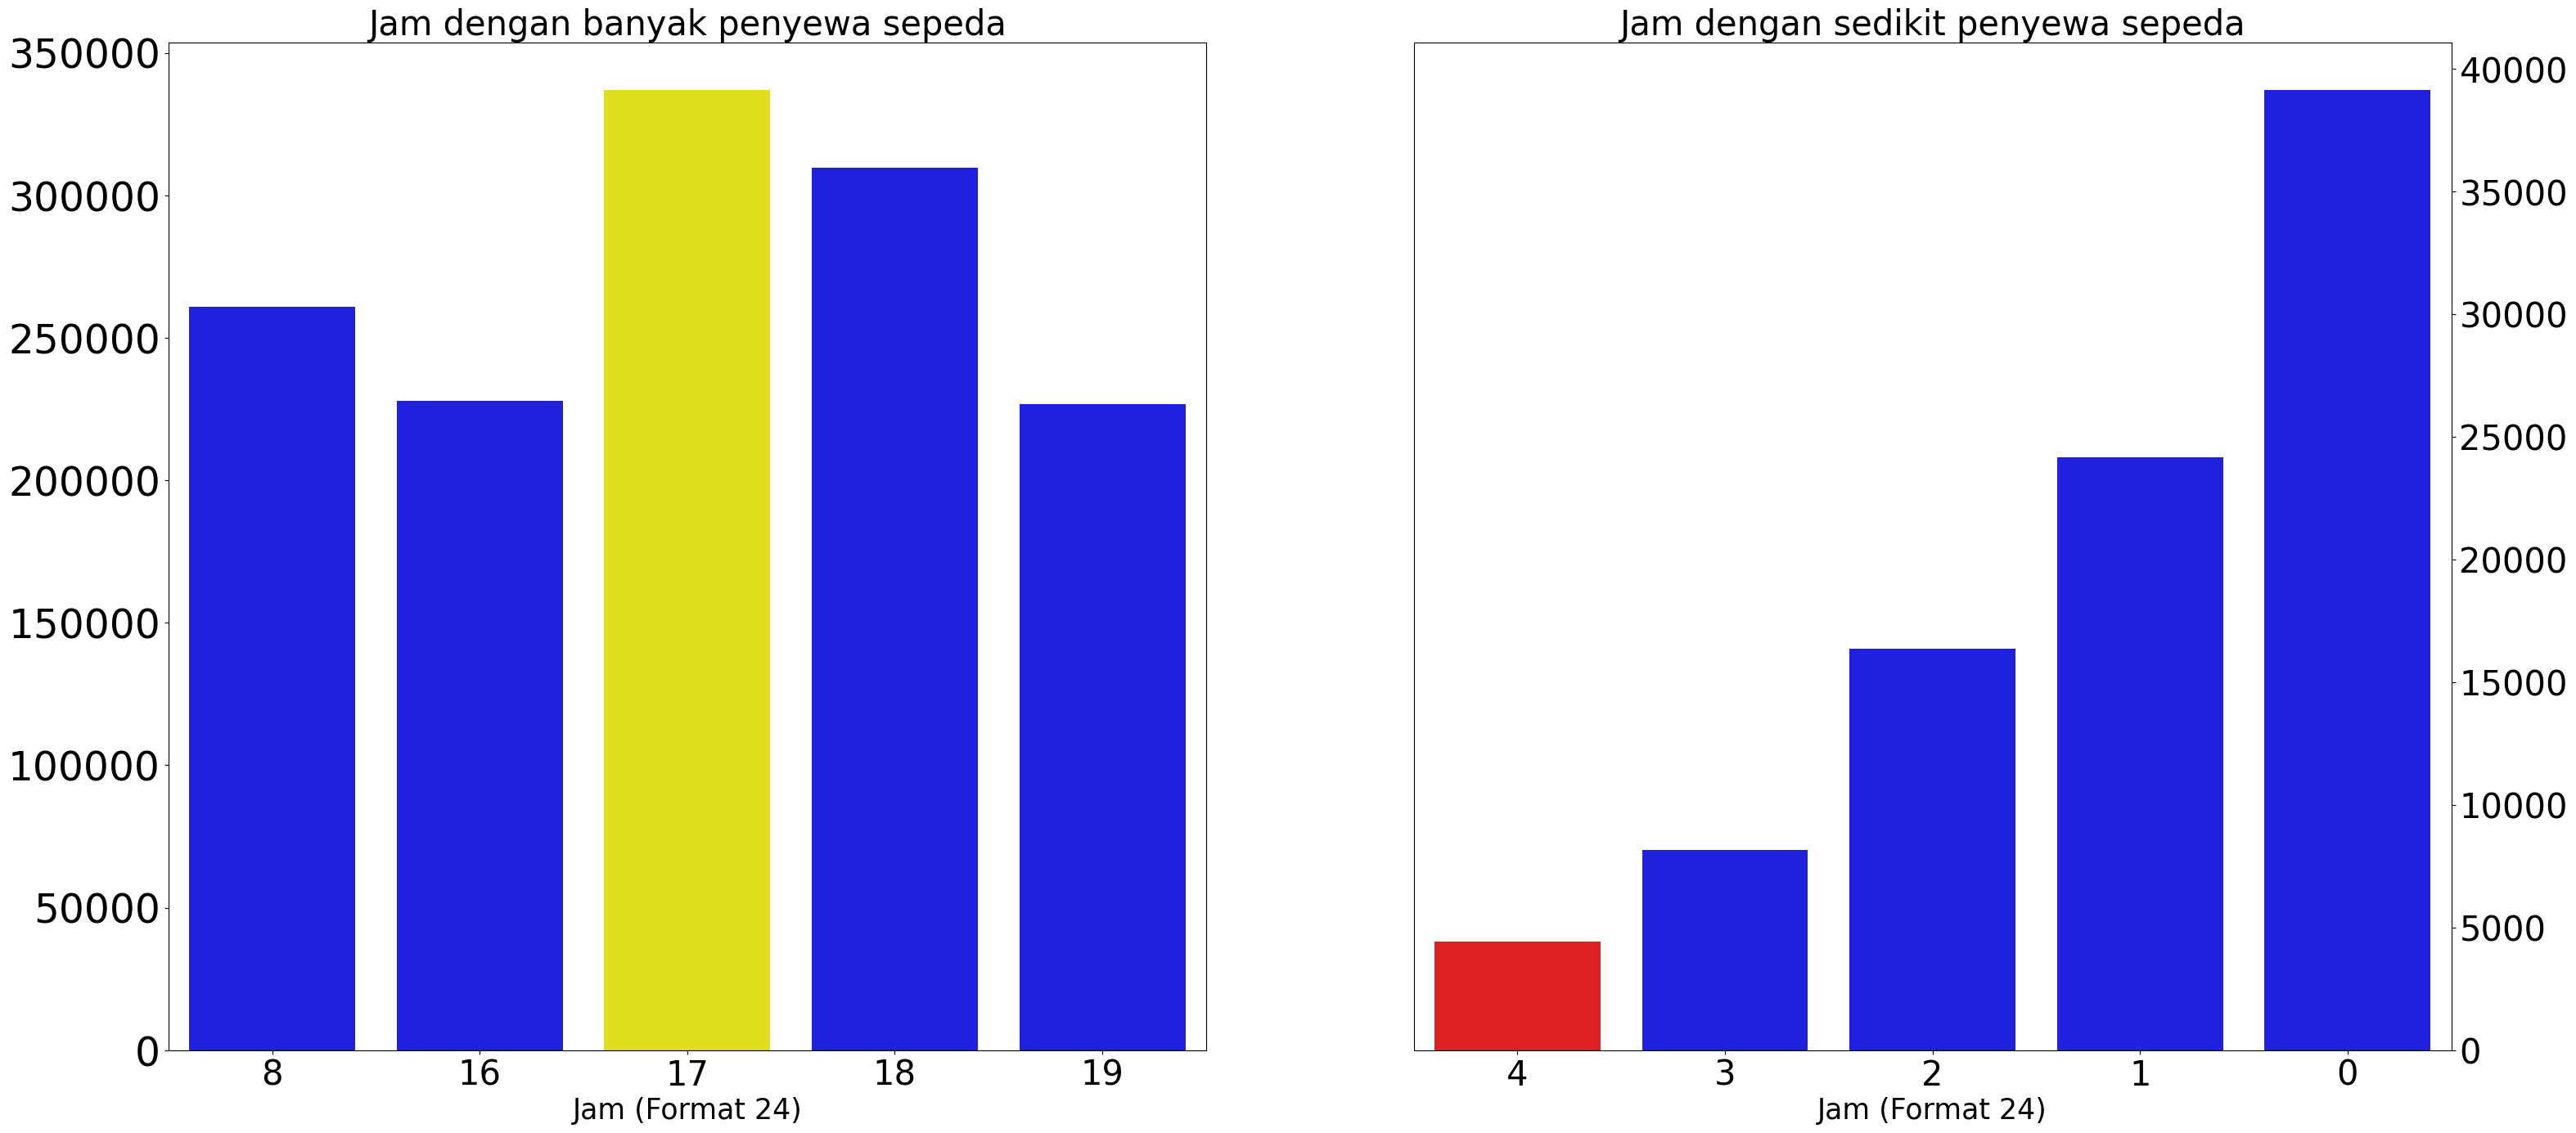

In [31]:
# membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(36, 16))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(x="hour", y="count", data=sum_hour_df.head(5), palette=["blue", "blue", "yellow", "blue", "blue"], ax=ax[0])

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Jam (Format 24)", fontsize=25)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# membuat barplot untuk penyewa sepeda terdikit
sns.barplot(x="hour", y="count", data=sum_hour_df.sort_values(by="hour", ascending=True).head(5), palette=["blue", "blue", "blue", "blue","red"], ax=ax[1])

# mengatur label dan judul untuk subplot pertama
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jam (Format 24)",  fontsize=25)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=30)
ax[1].tick_params(axis='x', labelsize=30)

# menampilkan plot
plt.show()

Penyewaan Sepeda Di tahun 2011 dan 2012 Paling banyak dilakukan  Pada Jam 17.00 sore hari dengan total penyewaan pada jam tersebut sebanyak 336860 , Sedangkan Waktu(Jam)  paling sedikit yang dilakukan pelanggan untuk menyewa sepeda pada jam 04.00 waktu dini hari dengan total penyewaan sebanyak 4428 penyewaan.

### Pertanyaan 3: Bagaimana Perbandingan jumlah penyewaan sepeda antara jam 00.00-11.59 dengan jam 12.00-23.59 (AM dan PM)

C:\Users\lutfh\AppData\Local\Temp\ipykernel_10040\2351193960.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_data = hourly_data.groupby(by="category").agg({


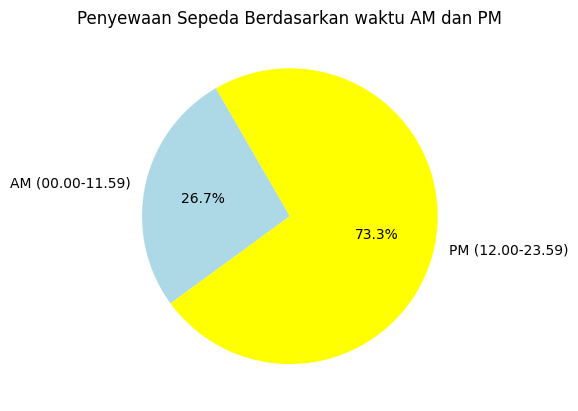

In [32]:
# Membuat grouping data hour dan menjumlahkan count yang dimiliki
hourly_data = hour_df.groupby(by="hour").agg({
    "count": "sum"
}).reset_index()

# Membuat 2 kategori yaitu jam pada pukul (00.00-11.59) sebagai AM dan jam pada pukul (12.00-23.59) sebagai PM
category_labels = ['AM (00.00-11.59)', 'PM (12.00-23.59)']
hourly_data['category'] = pd.cut(hourly_data['hour'], bins=[0, 11, 23], labels=category_labels, right=False)

# Membuat grouping lagi data berdasarkan kategori diatas kemudian menghitung total count pada tiap ktegori
category_data = hourly_data.groupby(by="category").agg({
    "count": "sum"
}).reset_index()

# Membuat Pie Chart
plt.pie(category_data['count'], labels=category_data['category'], autopct='%1.1f%%', startangle=120, colors=['lightblue', 'yellow'])
plt.title('Penyewaan Sepeda Berdasarkan waktu AM dan PM')
plt.show()

Berdasarkan *pie chart* diatas dapat kita lihat bahwa Waktu Penyewaan Sepeda Di tahun 2011 dan 2012 Berdasarkan dataset ini di donimasi pada saat waktu setelah siang hari hingga tengah malam,yakni waktu (PM) dengan 73,3% dari total penyewaan. Sedangkan penyewaan sepeda pada waktu dari tengah malam sampai siang hari (AM) hanya menyumbang sebanyak 26,7% dari total penyewaan sepeda

### Pertanyaan 4: Bagaimana perbandingan jumlah antara pelanggan jenis registered dan casual ?

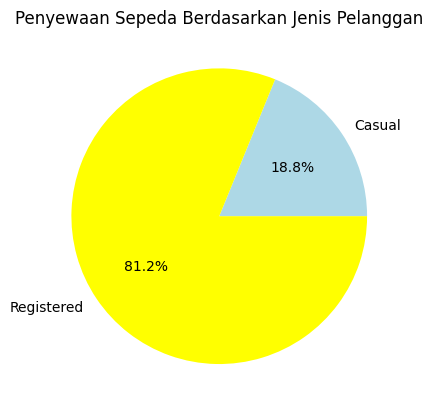

In [33]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.title('Penyewaan Sepeda Berdasarkan Jenis Pelanggan')
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'yellow'])

# Menampilkan pie plot
plt.show()

Bisa dilihat berdasarkan pie chart diatas bahwa pengguna penyewa sepeda pada tahun 2011 dan 2012 pada dataset ini didominasi oleh pelanggan registered sebanyak 81,2%, Sedangkan pelanggan Casual hanya sebanyak 18,2%

### Pertanyaan 5: Bagaimana performa penyewaan sepeda per bulan tiap tahunnya?

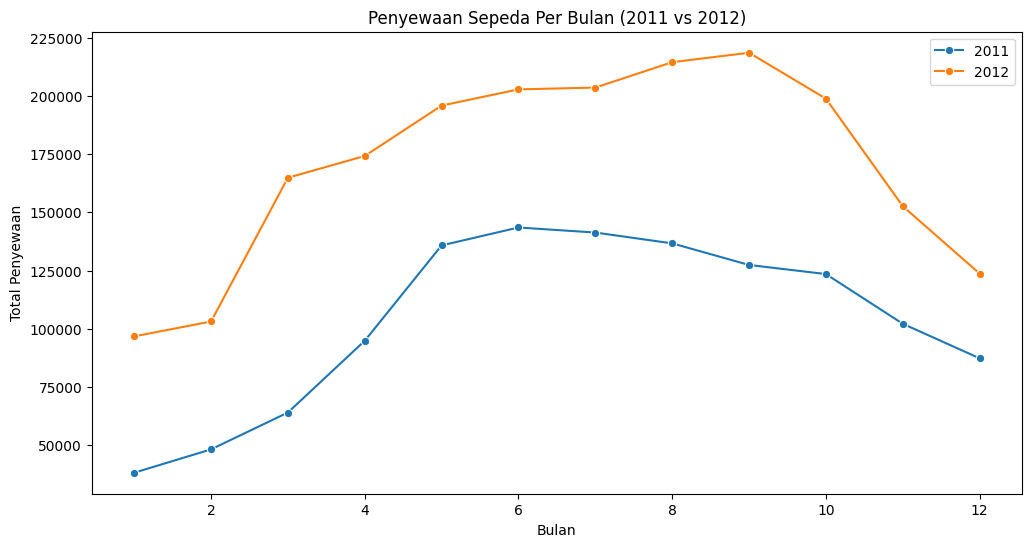

In [34]:
# Membuat variabel baru yang berisi filter untuk mengambil data sesuai tahun yang diinginkan
df_2011 = day_df[day_df['date'].dt.year == 2011]
df_2012 = day_df[day_df['date'].dt.year == 2012]

# Kemudian melakukan grouping data dengan bulan, lalu menghitung total penyewaan sepeda tiap bulannya
df_2011_monthly = df_2011.groupby(df_2011['date'].dt.month).agg({'count': 'sum'})
df_2012_monthly = df_2012.groupby(df_2012['date'].dt.month).agg({'count': 'sum'})

# Membuat line chart untuk membandingkan total penyewaan tiap bulannya di tahun 2011 dan 2012 menggunakan seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_2011_monthly.index, y=df_2011_monthly['count'], label='2011', marker='o')
sns.lineplot(x=df_2012_monthly.index, y=df_2012_monthly['count'], label='2012', marker='o')

plt.legend()
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.title('Penyewaan Sepeda Per Bulan (2011 vs 2012)')
plt.show()

Bisa dilihat pada *Line Chart* diatas secara garis bahwa total penyewaan tiap bulan menunjukan bahwa penyewaan sepeda pada tahun 2012 lebih banyak dibandingkan pada tahun 2011.

## Conclusion

**Pertanyaan**

Pertanyaan 1: Pada musim apa penyewaan sepeda paling banyak dan paling sedikit dilakukan?

Pertanyaan 2: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit sepanjang tahun 2011 dan 2012?

Pertanyaan 3: Bagaimana Perbandingan jumlah penyewaan sepeda antara jam 00.00-11.59 dengan jam 12.00-23.59 (AM dan PM)?

Pertanyaan 4: Bagaimana perbandingan jumlah antara pelanggan jenis registered dan casual ?

Pertanyaan 5: Bagaimana performa penyewaan sepeda per bulan tiap tahunnya?

- Conclution pertanyaan 1: Penyewaan sepeda paling banyak di lakukan pada **musim gugur (fall)**. Sedangkan untuk penyewaan sepeda paling sedikit di lakukan pada **musim semi (spring)**.

- Conclution pertanyaan 2: Penyewaan Sepeda paling banyak di lakukan di jam **17.00** sore hari , kemudian di ikuti oleh jam 18.00, 8.00, 19.00, 16.00 . Hal ini menunjukan bahwa penyewaan sepeda paling banyak dilakukan di jam-jam berangkat aktivitas dan pulang dari aktivitas. Sedangkan jam penyewaan sepeda paling sedikit ialah pada jam **04.00** dini hari, kemudian jam 03.00, 02.00, 01.00, dan 00.00. ini menunjukan penyewaaan sepeda jumlahnya minim di waktu tidur.

- Conclution Pertanyaan 3: Perbandingan penyewaan sepeda pada waktu AM dan PM cukup jauh yaitu **26,7%** berbanding **73,3%** dari keseluruhan data. Artinya adalah waktu penyewaan sepeda lebih banyak dilakukan dari siang hari sampai sebelum tengah malam.

- Conclution pertanyaan 4: Perbandingannya Cukup besar dimana pelanggan di dominasi oleh pelanggan **Registered** sebanyak **81.2%** pelanggan di dalam kelompok registered dan sisanya yaitu **18.8%** pelanggan berada di kelompok **casual**.

- Conclution pertanyaan 5: Berdasarkan hasil visualisasi data dapat dilihat jumlah penyewaan sepeda tiap bulan di tahun 2012 lebih banyak dibandingkan di bulan yang sama pada tahun 2011. Ini berarti menunjukkan penyewaan sepeda ini mendapat respon dari masyarakat dibuktikan dengan jumlah penggunanya naik. Selain itu, dari hasil visualisasi kita juga dapat simpulkan bahwa naik turunnya jumlah pelanggan penyewa sepeda cenderung sama sepanjang tahun. Baik tahun 2011 ataupun 2012 memiliki pola grafik jumlah penyewa sepeda sama.

